In [34]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

TIME_FRAMES = 50
BUFFER_SIZE = 50
AMOUNT_OF_FRAMES = TIME_FRAMES - BUFFER_SIZE + 1

frame_sq = []
frame_sq_gray = []
frame_sq_edges = []

dataset_no = input("starting number: ")
entry_count = 0
                    
h = np.ndarray((AMOUNT_OF_FRAMES, 4))
# h_histo = np.ndarray((AMOUNT_OF_FRAMES,256))
s = np.ndarray((AMOUNT_OF_FRAMES, 4))
# s_histo = np.ndarray((AMOUNT_OF_FRAMES,256))
v= np.ndarray((AMOUNT_OF_FRAMES, 4))
# v_histo = np.ndarray((AMOUNT_OF_FRAMES,256))
frame_edges_comp = np.ndarray((AMOUNT_OF_FRAMES,1))
frame_comp = np.ndarray((AMOUNT_OF_FRAMES,1))

# rgb = np.ndarray((TIME_FRAMES - (TIME_FRAMES % BUFFER_SIZE), 3))



In [25]:
def calculate_n_of_hsv(frame_sq,n):
    sum_n = 0
    max_n = 0
    min_n = 255
    var_n = 0
#     histo = np.zeros((AMOUNT_OF_FRAMES,256))
    for frame in frame_sq:
        var_n += np.var(frame[:,:,n])
        sum_n += np.sum(frame[:,:,n])
        max_n = max(max_n, np.max(frame[:,:,n]))
        min_n = min(min_n, np.min(frame[:,:,n]))

#     for frame in frame_sq:
#         for pxl in frame:
#             x = frame[n]
#             histo[x] += 1
#             sum_n += x
#             max_n = max(max_n, x)
#             min_n = min(min_n, x)
#     return (np.array([avg_n, max_n, min_n]), histo)
    avg_n = sum_n/ len(frame_sq) * frame_sq[0].shape[0] * frame_sq[0].shape[1]
    return np.array([avg_n, max_n, min_n, var_n])
def calculate_comp(frame_sq):
    sum_comp = 0
    for i in range(len(frame_sq)):
        if(i != 0):
            sum_comp += compare_img(frame_sq[i], frame_sq[i-1])
#         if(i == 1): print(compare_img(frame_sq[i], frame_sq[i-1]))
    sum_comp /= (len(frame_sq) - 1)
    return sum_comp

In [26]:
def compare_img(img1,img2):
    img1 = normalize_gray(img1)
    img2 = normalize_gray(img2)
    diff = img1 - img2
    m_norm = np.sum(abs(diff))
    return m_norm

def normalize_gray(frame):
    rng = np.max(frame) - np.min(frame)
    amin = np.min(frame)
    return (frame-amin)/rng #range from [0,1]

In [27]:
def createDataset(data):
    dataset = data[0].copy()
    data.remove(data[0])
    for datum in data:
        dataset = np.append(dataset, datum, axis = 1)
    return dataset
def createTSV(dataset):
    dataset = (dataset.copy()).astype(str)
    datasetName = "dataset" + str(dataset_no) + ".tsv"
    file = open(datasetName, "w")
#     file.write("h\ts\tv\tframe_edges_comp\tframe_comp\n")
    for i in range(dataset.shape[0]):
        file.write("\t".join(dataset[i,:].tolist()))
        file.write("\n")
#         if(i + 1 != dataset.shape[0]):
#             file.write("\n")
    file.close()
    return
def createTSVLabel(dataset):
    dataset = (dataset.copy()).astype(str)
    datasetName = "label" + str(dataset_no) + ".tsv"
    file = open(datasetName, "w")
    file.write("havg\thmax\thmin\thv\tsavg\tsmax\tsmin\tsv\tvavg\tvmax\tvmin\tvv\tframe_edges_comp\tframe_comp\n")
    for i in range(dataset.shape[0]):
        file.write("\t".join(dataset[i,:].tolist()))
        file.write("\n")
#         if(i + 1 != dataset.shape[0]):
#             file.write("\n")
    file.close()
    return

In [28]:
def createCSV(dataset):
    dataset = (dataset.copy()).astype(str)
    dataset_name = "dataset" + str(dataset_no) + ".csv"
    csv = open(dataset_name, "w")
    columnTitleRow = "havg,hmax,hmin,hv,savg,smax,smin,sv,vavg,vmax,vmin,vv,frame_edges_comp,frame_comp\n"
    csv.write(columnTitleRow)
    for i in range(dataset.shape[0]):
        csv.write(",".join(dataset[i,:].tolist()))
        csv.write("\n")
    csv.close()

In [33]:
cap = cv2.VideoCapture(0)

frame_counter = 0
buffer_counter = 0
# filename = 'eye0.avi'
# out = cv2.VideoWriter(filename, get_video_type(filename), 25, get_dims(cap, res))

while(True):
    ret, frame = cap.read()
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    frame_sq.append(hsv)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_sq_gray.append(gray)
    edges = cv2.Canny(gray,100,200)
    frame_sq_edges.append(edges)
    
    if(len(frame_sq) <=  BUFFER_SIZE):
        continue
    if(len(frame_sq) > BUFFER_SIZE): 
        frame_sq.remove(frame_sq[0])
        frame_sq_edges.remove(frame_sq_edges[0])
        frame_sq_gray.remove(frame_sq_gray[0])
        h[buffer_counter,:] = calculate_n_of_hsv(frame_sq,0)
        s[buffer_counter,:] = calculate_n_of_hsv(frame_sq,1)
        v[buffer_counter,:] = calculate_n_of_hsv(frame_sq,2)
        frame_edges_comp[buffer_counter,0] = calculate_comp(frame_sq_edges)
        frame_comp[buffer_counter,0] = calculate_comp(frame_sq_gray)
#     (h[buffer_counter,:], h_histo) = calculate_n_of_hsv(frame_sq, 0)
#     (s[buffer_counter,:], s_histo) = calculate_n_of_hsv(frame_sq, 1)
#     (v[buffer_counter,:], v_histo) = calculate_n_of_hsv(frame_sq, 2)
            
    cv2.imshow("frame",frame)
#     print("BUFFER: ", buffer_counter,end="\r")
    buffer_counter += 1
    if(buffer_counter >= AMOUNT_OF_FRAMES): break

frame_sq = []
frame_sq_edges = []
frame_sq_gray = []
dataset = createDataset([h, s, v, frame_edges_comp, frame_comp])
createTSV(dataset)
cap.release()
cv2.destroyAllWindows()

/home/bon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [30]:
createTSV(dataset)


In [31]:
createTSVLabel(dataset)

In [7]:
createCSV(dataset)

In [11]:
print(dataset.shape)

(176, 14)


In [44]:
print(frame_comp)

[[ 8395.  ]
 [ 8128.  ]
 [ 7781.5 ]
 [ 7634.75]
 [ 7221.5 ]
 [ 7954.75]
 [ 8836.75]
 [ 9791.5 ]
 [10636.  ]
 [ 9592.25]
 [ 8518.  ]
 [ 8076.5 ]
 [ 8317.5 ]
 [ 9217.75]
 [10057.25]
 [ 9550.  ]
 [ 9421.25]
 [ 9902.5 ]
 [10550.75]
 [11820.5 ]
 [12481.5 ]
 [12785.25]
 [12548.  ]
 [12327.25]
 [10875.5 ]
 [ 9142.  ]
 [ 7708.75]
 [ 6677.5 ]
 [ 7385.5 ]
 [ 8772.25]
 [10304.25]
 [11033.5 ]
 [11298.75]
 [10809.  ]
 [10584.  ]
 [10682.25]
 [10477.5 ]
 [10726.  ]
 [10503.5 ]
 [10307.  ]
 [10228.5 ]
 [10066.5 ]
 [ 9725.75]
 [ 9856.  ]
 [10143.5 ]
 [10385.25]
 [10729.25]
 [10571.25]
 [10166.  ]
 [ 9845.5 ]
 [ 9603.25]
 [ 9409.25]
 [ 9274.5 ]
 [ 9044.5 ]
 [ 8791.25]
 [ 8439.25]
 [ 7808.75]
 [ 7151.75]
 [ 6590.5 ]
 [ 6176.75]
 [ 6013.25]
 [ 5847.75]
 [ 5538.  ]
 [ 5458.5 ]
 [ 5825.25]
 [ 6268.  ]
 [ 6963.5 ]
 [ 6945.  ]
 [ 6077.75]
 [ 5435.75]
 [ 4617.  ]
 [ 3784.75]
 [ 3127.75]
 [ 2218.  ]
 [ 1393.5 ]
 [ 1031.  ]
 [  950.25]
 [ 1342.  ]
 [ 2681.25]
 [ 4882.75]
 [ 6512.  ]
 [ 6833.5 ]
 [ 5766.25]
 [ 3

In [ ]:

# Set resolution for the video capture
# Function adapted from https://kirr.co/0l6qmh
def change_res(cap, width, height):
    cap.set(3, width)
    cap.set(4, height)

# Standard Video Dimensions Sizes
STD_DIMENSIONS =  {
    "480p": (640, 480),
    "720p": (1280, 720),
    "1080p": (1920, 1080),
    "4k": (3840, 2160),
}


# grab resolution dimensions and set video capture to it.
def get_dims(cap, res='1080p'):
    width, height = STD_DIMENSIONS["480p"]
    if res in STD_DIMENSIONS:
        width,height = STD_DIMENSIONS[res]
    ## change the current caputre device
    ## to the resulting resolution
    change_res(cap, width, height)
    return width, height

# Video Encoding, might require additional installs
# Types of Codes: http://www.fourcc.org/codecs.php
VIDEO_TYPE = {
    'avi': cv2.VideoWriter_fourcc(*'XVID'),
    #'mp4': cv2.VideoWriter_fourcc(*'H264'),
    'mp4': cv2.VideoWriter_fourcc(*'XVID'),
}

def get_video_type(filename):
    filename, ext = os.path.splitext(filename)
    if ext in VIDEO_TYPE:
      return  VIDEO_TYPE[ext]
    return VIDEO_TYPE['avi']


In [ ]:
    import cv2
    import numpy as np
    cap = cv2.VideoCapture(0)
     
    ret, frame1 = cap.read()
    prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    hsv = np.zeros_like(frame1)
    hsv[...,1] = 255
     
    while(1):
        ret, frame2 = cap.read()
        next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
   
        flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

        mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
        hsv[...,0] = ang*180/np.pi/2
        hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
        bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
   
        cv2.imshow('frame2',bgr)
        k = cv2.waitKey(30) & 0xff
        if k == 27:
            break
        elif k == ord('s'):
            cv2.imwrite('opticalfb.png',frame2)
            cv2.imwrite('opticalhsv.png',bgr)
        prvs = next
   
    cap.release()
    cv2.destroyAllWindows()

[ 1.83724289  0.06713018  0.93441583 ..., -0.3281157   0.40083236
  1.02847649]
[ 0.26752601  0.57297837  0.73026804 ...,  1.12205039 -1.26870576
 -0.07768208]


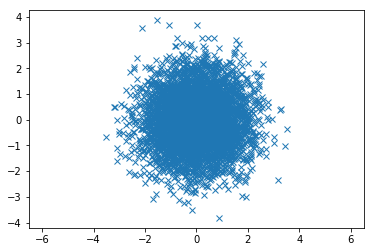

In [ ]:
import matplotlib.pyplot as plt
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 5000).T
print(x)
print(y)
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

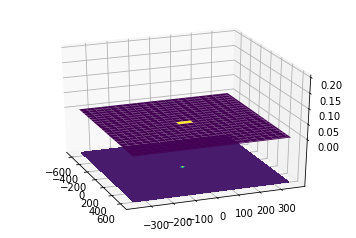

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 65
X = np.linspace(-1280/2, 1280/2, N)
Y = np.linspace(-720/2, 720/2, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
Sigma = np.array([[ 1. , 0], [0,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

In [ ]:
import torch
torch.cuda.current_device()
torch.cuda.device_count()
torch.cuda.get_device_name(0)

import tensorflow as tf
tf.Session(config=tf.ConfigProto(log_device_placement=True))

C:\Users\nishimura4\Anaconda3\lib\site-packages\torch\cuda\__init__.py:116: UserWarning: 
    Found GPU0 GeForce GTX 770 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))
